In [1]:
import rasterio
with rasterio.open('https://landsat-pds.s3.amazonaws.com/L8/139/045/LC81390452014295LGN00/LC81390452014295LGN00_B1.TIF') as img:
    print(img.profile)
    print("NoData:", img.nodatavals)
    rdr = img.read()

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7621, 'height': 7791, 'count': 1, 'crs': CRS.from_epsg(32645), 'transform': Affine(30.0, 0.0, 381885.0,
       0.0, -30.0, 2512815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
NoData: (None,)


In [7]:
import numpy as np
print("min:", rdr.min())
print("max:", rdr.max())
print("mean:", rdr.mean())
print("median:", np.median(rdr))

min: 0
max: 40674
mean: 7444.400820099822
median: 10413.0


Text(0.5, 1.0, 'Blue')

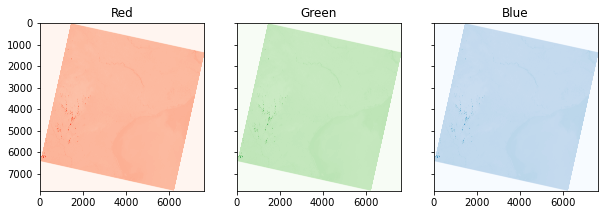

In [14]:
from rasterio.plot import show
# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show(rdr, cmap='Reds', ax=ax1)
show(rdr, cmap='Greens', ax=ax2)
show(rdr, cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

Text(0, 0.5, 'Row #')

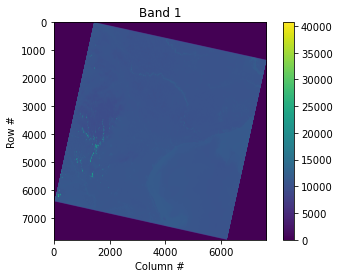

In [3]:
from matplotlib import pyplot as plt
plt.imshow(rdr[0])
plt.colorbar()
plt.title('Band 1')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

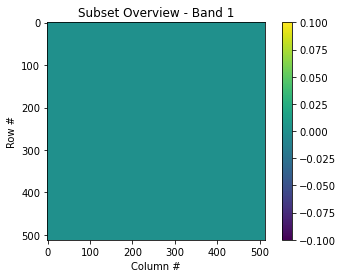

In [26]:
import random
with rasterio.open('https://landsat-pds.s3.amazonaws.com/L8/139/045/LC81390452014295LGN00/LC81390452014295LGN00_B1.TIF') as img:
    ij, window = random.choice(list(img.block_windows()))
    rdr = img.read(window=window)
plt.imshow(rdr[0])
plt.colorbar()
plt.title('Subset Band 1')
plt.xlabel('Column #')
plt.ylabel('Row #')